In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:   #extracting the file names from the filenames list, 
        print(os.path.join(dirname, filename))           #and printing the full path of each file by concatenating the dirname and filename using os.path.join() function.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import matplotlib.pyplot as plt   # importing the necessary libraries matplotlib.pyplot,seaborn 
import seaborn as sns             
%matplotlib inline 
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')    # loading the train.csv and test.csv files from the digit-recognizer dataset stored in the Kaggle input directory 
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')      #into pandas dataframes named train and test, respectively. 

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
train.head()
# by default pd.head() displays only 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# printing more rows to view the data
train.head(10)
# label shows the digit present at a particular index in the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head() #no label, and that is need to be predicted 
# This model needs to predict which digit is present at an index in the test.csv dataset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

In [9]:
X_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train.head()

0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32

In [11]:
# frequency of each digit in the dataset
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

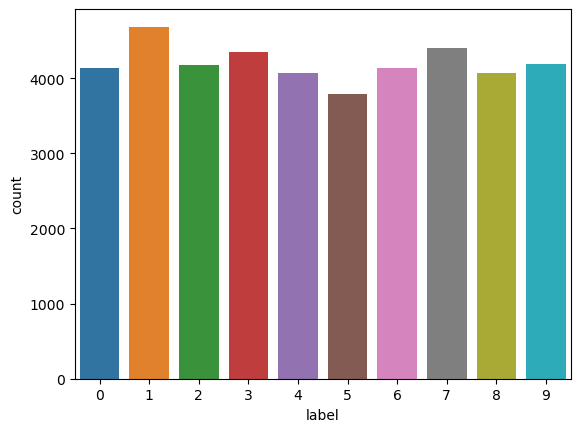

In [12]:
sns.countplot(x='label', data=train);

In [13]:
# Data Normalisation
X_train = X_train/255
X_test = X_test/255
# Reshaping
Train= X_train.values.reshape(-1, 28, 28, 1)
Test = X_test.values.reshape(-1, 28, 28, 1)
Train.shape, Test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

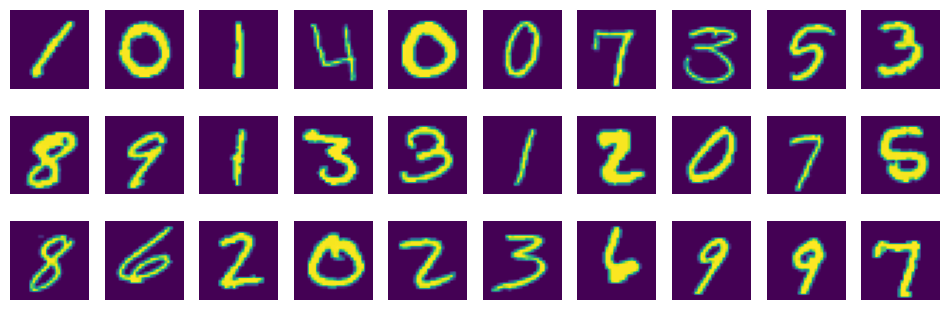

In [14]:
plt.figure(figsize=(12,8))
for i in range(30):
    plt.subplot(6,10,i+1)
    plt.imshow(Train[i].reshape((28,28)))
    plt.axis("off")
plt.show()

In [15]:
# to_categorical function returns a matrix of binary values
# It has number of rows equal to the length of the input vector and number of 
# columns equal to the number of classes.
from keras.utils.np_utils import to_categorical
target = to_categorical(train['label'],num_classes=10)
print("Before applying the function")
print(train['label'])
print("After applying the function")
print(target)
print(target.shape)

Before applying the function
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
After applying the function
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(42000, 10)


In [16]:
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=15,
        zoom_range = 0.15,
        width_shift_range=0.15,
        height_shift_range=0.15)

datagen.fit(Train)

In [17]:
from sklearn.model_selection import train_test_split              #splitting the Train and target datasets into training and validation sets.
x_train, x_val, y_train, y_val=train_test_split(Train, target, 
                                            test_size=0.2, random_state=11)  #20% of dataset is used for the validation

In [18]:
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600, 10) (8400, 10)


In [19]:
#imports the necessary libraries for building a deep learning model using Keras with TensorFlow backend.
import tensorflow as tf
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import  Lambda , Dense, Flatten, Dropout,Dense,Conv2D
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Sequential model is used when each layer has exactly one input and one output tensor
Convolutional filters help in extracting specific features from input data

Conv2D: This layer performs a convolution operation on the input image, using 16 filters of size 3x3. It uses the ReLU activation function and adds padding to ensure the output has the same dimensions as the input.

BatchNormalization: This layer normalizes the output of the previous layer to ensure that the activations are within a certain range and helps the model converge faster.

MaxPooling2D: This layer reduces the spatial dimensions of the output by performing max pooling operation with a 2x2 filter.

Dropout Layer:
        Dropout is a regularization technique that randomly ignores a proportion of nodes in the layer during training, forcing the network to learn features in a distributed way.
        In this model, I have used Dropout layer to reduce overfitting and improve generalization.
        The proportion of nodes to drop can be set using a dropout rate hyperparameter.

Flatten: This layer flattens the output of the previous layer into a 1-dimensional vector that can be fed into a fully connected layer.

Dense: This layer is a fully connected layer with 64 units and the ReLU activation function. It also includes L2 regularization to prevent overfitting.

In [20]:
# CNN model is designed to classify input images into one of 10 classes, 
# using a combination of convolutional and fully connected layers to extract and transform the input data before producing the final output.
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),padding='same', 
                 activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                        

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])    #to compile the model before training.

In [23]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=128),           #generates augmented images in real-time of number of samples equal to batch size in one training.
                                epochs = 30,validation_data = (x_val,y_val),  #The number of epochs (iterations over the entire training set) to be used during training.
                                 steps_per_epoch=len(x_train)/128,verbose=1,
                                 callbacks=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5))  #to stop the training process if the validation loss does not improve for 5 consecutive epochs.

Epoch 1/30
262/262 [==============================] - 18s 65ms/step - loss: 2.2892 - accuracy: 0.4810 - val_loss: 5.0337 - val_accuracy: 0.1440
Epoch 2/30
262/262 [==============================] - 17s 66ms/step - loss: 0.7592 - accuracy: 0.8637 - val_loss: 0.4557 - val_accuracy: 0.9333
Epoch 3/30
262/262 [==============================] - 17s 64ms/step - loss: 0.4906 - accuracy: 0.9174 - val_loss: 0.2275 - val_accuracy: 0.9761
Epoch 4/30
262/262 [==============================] - 17s 64ms/step - loss: 0.3866 - accuracy: 0.9336 - val_loss: 0.1898 - val_accuracy: 0.9818
Epoch 5/30
262/262 [==============================] - 18s 67ms/step - loss: 0.3359 - accuracy: 0.9403 - val_loss: 0.1730 - val_accuracy: 0.9823
Epoch 6/30
262/262 [==============================] - 16s 63ms/step - loss: 0.3157 - accuracy: 0.9456 - val_loss: 0.1696 - val_accuracy: 0.9835
Epoch 7/30
262/262 [==============================] - 17s 64ms/step - loss: 0.2921 - accuracy: 0.9499 - val_loss: 0.1512 - val_accuracy:

In [24]:
predicted=model.predict(x_val)

263/263 [==============================] - 2s 6ms/step


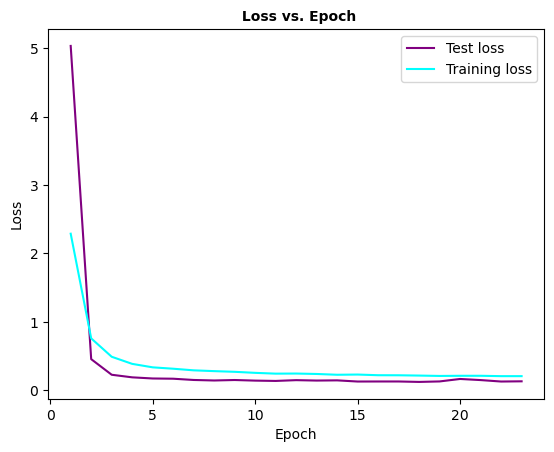

In [25]:
plt.xlabel('Epoch')                   #sets the x-axis label for the subplot to "Epoch".
plt.ylabel('Loss')                    #sets the y-axis label for the subplot to "Loss".
plt.title(' Loss vs. Epoch',weight='bold', fontsize=10)    #sets the title of the subplot to "Loss vs. Epoch" and specifies the font weight and size.
train_loss = history.history['loss']                       #extracts the training loss values from the model's history object and assigns them to the train_loss variable.
test_loss = history.history['val_loss']                    #extracts the validation loss values from the model's history object and assigns them to the test_loss variable.
x = list(range(1, len(test_loss) + 1))                     #creates a list of integers from 1 to the number of validation loss values, which will be used as the x-axis values in the plot.
plt.plot(x, test_loss, color = 'purple', label = 'Test loss')   #plots the validation loss values against the epoch values using a purple line and adds a label to the plot legend.
plt.plot(x, train_loss,color='cyan', label = 'Training loss')   #plots the training loss values against the epoch values using a cyan line and adds a label to the plot legend.
plt.legend()                   #adds a legend to the plot.

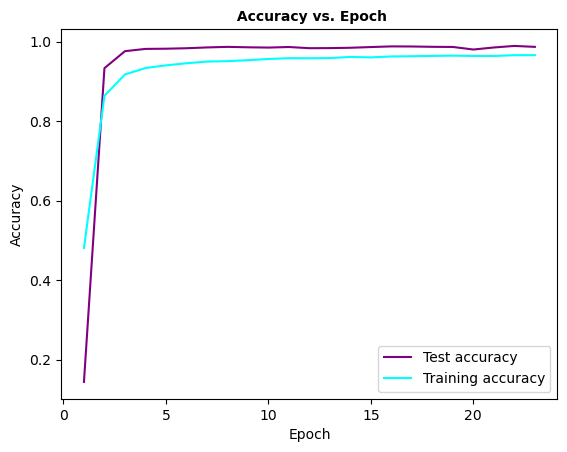

In [26]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(' Accuracy vs. Epoch', weight='bold', fontsize=10) 
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
x = list(range(1, len(test_acc) + 1))
plt.plot(x, test_acc, color = 'purple', label = 'Test accuracy')
plt.plot(x, train_acc, color= 'cyan',label = 'Training accuracy')
plt.legend() 

plt.show()

In [27]:
history_df = pd.DataFrame(history.history) 
print("Maximum accuracy: {}".format(history_df['accuracy'].max()))
print("Minimum loss: {}".format(history_df['loss'].min()))
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

Maximum accuracy: 0.9660714268684387
Minimum loss: 0.20706236362457275
Minimum validation loss: 0.12275989353656769
Maximum validation accuracy: 0.9892857074737549


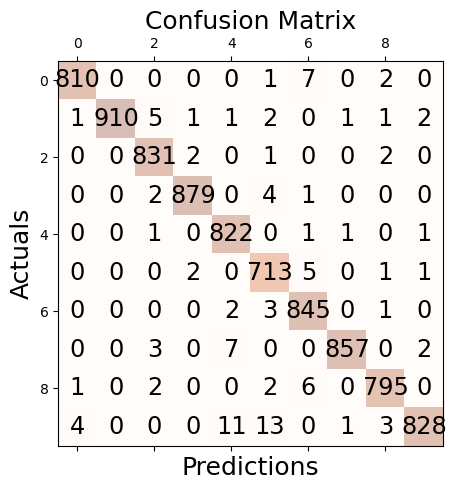

In [28]:
#Generating a confusion matrix which is a table that is often used to describe the performance of a classification model. 
#It shows the number of true positives, true negatives, false positives, and false negatives for each class in a multi-class classification problem.
#The diagonal elements represent the correctly classified instances, and off-diagonal elements represent the misclassified instances. 
#The brightness of each square indicates the number of instances it contains.
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
y1 = np.argmax(predicted, axis = 1)
y2 = np.argmax(y_val, axis = 1) 
c_matrix = confusion_matrix(y2,y1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(c_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(c_matrix.shape[0]):
    for j in range(c_matrix.shape[1]):
        ax.text(x=j, y=i,s=c_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
precision = precision_score(y2, y1, average='macro')
print('Precision score:', precision)

Precision score: 0.986526803107051


In [30]:
f1score = f1_score(y2, y1, average='macro')
print('F1 Score:', f1score)

F1 Score: 0.9866862745401447


In [31]:
recallscore = recall_score(y2, y1, average='macro')
print('recall Score:', recallscore)

recall Score: 0.9869747385849583


In [32]:
accuracyscore = accuracy_score(y2, y1)
print('accuracy Score:', accuracyscore)

accuracy Score: 0.986904761904762


In [33]:
y_test=model.predict(Test)

875/875 [==============================] - 6s 7ms/step


In [34]:
y_test=[np.argmax(z) for z in y_test]    #converts the one-hot encoded labels in y_test to their corresponding class index 
for i in range(30):                      #and prints the class index of the first 10 samples in y_test.
    print(y_test[i],end=" ")

2 0 9 0 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 

In [35]:
submission=pd.DataFrame({'ImageId':[i+1 for i in range(len(y_test))],'Label':y_test})
submission        #creates a new Pandas DataFrame called submission that contains the predicted labels for the test set. 
                  #The ImageId column contains integers from 1 to the length of y_test, and the Label column contains the predicted class labels.

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
